In [119]:
# Usei como base esse tutorial:
# https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/regression.ipynb#scrollTo=f-OHX4DiXd8x

In [120]:
# # # Clear logs
# # %rm -rf ./logs/

# # Ativação do Tensorboard
%conda activate pystock
%load_ext tensorboard

# # Reload Tensorboar
%reload_ext tensorboard



Note: you may need to restart the kernel to use updated packages.
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Sequential model

*Dense model 16*
*Dense model 16*
*Dense model 8*
*Dense model 4*
*Epoch 350*

_MSE: 1.31_
epoch: 350

Activation: softplus
Optimizer: Adam

15/15 - 0s - loss: 0.6325 - mae: 0.5830 - mse: 0.6325
Testing set Mean Abs Error:  0.58 ibova_0

In [121]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import datetime

from tensorflow import keras
from tensorflow.keras import layers

# Lendo Dfs

In [122]:
PATH_TREINO = '../Data/3_Gold/Treino_all_stocks.csv'
DF_TREINO = pd.read_csv(PATH_TREINO, sep=",")

PATH_VALIDACAO = '../Data/3_Gold/Validacao_all_stocks.csv'
DF_VALIDACAO = pd.read_csv(PATH_VALIDACAO, sep=",")

PATH_TESTE = '../Data/3_Gold/Teste_all_stocks.csv'
DF_TESTE = pd.read_csv(PATH_TESTE, sep=",")

In [123]:
# index,
# ibova_0,ibova_1,ibova_2,ibova_3,ibova_4,ibova_5,
# oil_0,oil_1,oil_2,oil_3,oil_4,oil_5,usd_0,
# usd_1,usd_2,usd_3,usd_4,usd_5,
# abev_0,abev_1,abev_2,abev_3,abev_4,abev_5,
# jbs_0,jbs_1,jbs_2,jbs_3,jbs_4,jbs_5,
# petr_0,petr_1,petr_2,petr_3,petr_4,petr_5,
# vale_0,vale_1,vale_2,vale_3,vale_4,vale_5

In [124]:
train_dataset = DF_TREINO
train_dataset = train_dataset.drop(['oil_0','usd_0','abev_0','jbs_0','petr_0','vale_0',], axis=1)
train_labels = train_dataset.pop('ibova_0')

test_dataset = DF_TESTE
test_dataset = test_dataset.drop(['oil_0','usd_0','abev_0','jbs_0','petr_0','vale_0',],axis=1)
test_labels = test_dataset.pop('ibova_0')

valid_dataset = DF_VALIDACAO
valid_dataset = valid_dataset.drop(['ibova_0','oil_0','usd_0','abev_0','jbs_0','petr_0','vale_0',],axis=1)
# valid_labels = valid_dataset.pop('ibova_0')

# Inspecionando os dados

In [125]:
# sns.pairplot(train_dataset[['index','ibova_0','ibova_1','ibova_2','ibova_3','ibova_4','oil_0','oil_1','oil_2','oil_3','oil_4','usd_0','usd_1','usd_2','usd_3','usd_4']], diag_kind="kde")
# sns.pairplot(train_dataset[['index','ibova_0','oil_0','usd_0']], diag_kind="kde")
# sns.pairplot(train_dataset[['ibova_1','oil_1','usd_1']], diag_kind="kde")

In [126]:
train_stats = train_dataset.describe()
# train_stats

# Definindo o modelo

In [127]:
# Diminuir quantidade de nós 
# Funcao logistica pra optimization
# Ver se relu funciona com RMSprop

# softplus melhor até agora
def build_model():
  model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='linear')
  ])

  # optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.00009,
                                       beta_1=0.9,
                                       beta_2=0.999,
                                       amsgrad=True)
  
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
model.summary()

# rmse pra avaliação, nao para loss


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 16)                592       
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_47 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_48 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 5         
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


# Definindo Métricas

In [128]:
# Seguindo esse tutorial para extrair metricas para o tensorboard
# https://www.tensorflow.org/tensorboard/get_started?hl=pt


# Define metrics
train_loss = tf.keras.metrics.Mean('train_loss', dtype=tf.float32)
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('train_accuracy')
test_loss = tf.keras.metrics.Mean('test_loss', dtype=tf.float32)
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('test_accuracy')


# Para salvar os arquivos de log
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
test_log_dir = 'logs/gradient_tape/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)



## Testando o modelo

In [129]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
# example_result

# Treinado o modelo

In [1]:
print(f'train_dataset: {train_dataset.columns()} \n')
print(f'valid_dataset: {valid_dataset.columns()} \n')
print(f'test_dataset: {test_dataset.columns()} \n')

NameError: name 'train_dataset' is not defined

In [131]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


EPOCHS = 500 

early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mse', patience=25, mode='min' ,restore_best_weights=True)

# earlystop como o val_mse 
# Add dados de validação 
#  validation_data=
# train_dataset = x
# train_labels = y

history = model.fit(
  train_dataset,train_labels,
  # validation_data=valid_dataset,
  validation_split=0.2,
  epochs=EPOCHS, verbose=1,
  callbacks=([early_stop,tensorboard_callback]))

#   validation_data=valid_dataset,

Epoch 1/500
36/36 [==============================] - 1s 36ms/step - loss: 4742.9609 - mae: 59.5938 - mse: 4742.9609 - val_loss: 15997.5820 - val_mae: 126.2164 - val_mse: 15997.5820
Epoch 2/500
36/36 [==============================] - 0s 2ms/step - loss: 3655.0383 - mae: 52.2453 - mse: 3655.0383 - val_loss: 12246.6299 - val_mae: 110.4307 - val_mse: 12246.6299
Epoch 3/500
36/36 [==============================] - 0s 2ms/step - loss: 2785.2380 - mae: 45.6147 - mse: 2785.2380 - val_loss: 9333.3574 - val_mae: 96.4031 - val_mse: 9333.3574
Epoch 4/500
36/36 [==============================] - 0s 3ms/step - loss: 2094.4639 - mae: 39.5575 - mse: 2094.4639 - val_loss: 7002.6577 - val_mae: 83.5005 - val_mse: 7002.6577
Epoch 5/500
36/36 [==============================] - 0s 2ms/step - loss: 1548.5331 - mae: 33.9984 - mse: 1548.5331 - val_loss: 5136.3027 - val_mae: 71.5112 - val_mse: 5136.3027
Epoch 6/500
36/36 [==============================] - 0s 2ms/step - loss: 1149.6985 - mae: 29.2844 - mse: 114

In [132]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.173079,0.334468,0.173079,0.246047,0.388409,0.246047,495
496,0.172990,0.334314,0.172990,0.245394,0.387188,0.245394,496
497,0.172937,0.334018,0.172937,0.245512,0.387473,0.245512,497
498,0.173385,0.334962,0.173385,0.244003,0.384622,0.244003,498
499,0.172588,0.333547,0.172588,0.246154,0.388743,0.246154,499


In [133]:
print(f'Min MSE: {hist.mse.min()}')
print(f'Min Val_MSE: {hist.val_mse.min()}')

Min MSE: 0.17258796095848083
Min Val_MSE: 0.24400289356708527


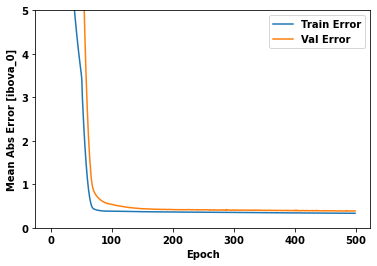

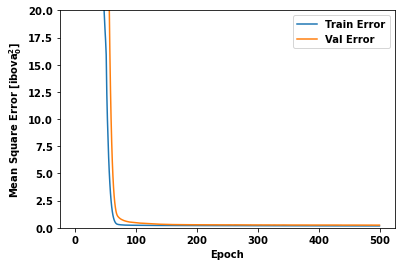

In [134]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [ibova_0]')
  plt.plot(hist['epoch'], hist['mae'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$ibova_0^2$]')
  plt.plot(hist['epoch'], hist['mse'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

Epoch 1/500
36/36 [==============================] - 1s 28ms/step - loss: 1200.8032 - mae: 29.9309 - mse: 1200.8032 - val_loss: 3349.0251 - val_mae: 57.7443 - val_mse: 3349.0251
Epoch 2/500
36/36 [==============================] - 0s 3ms/step - loss: 631.8521 - mae: 21.6848 - mse: 631.8521 - val_loss: 1663.2002 - val_mae: 40.6863 - val_mse: 1663.2002
Epoch 3/500
36/36 [==============================] - 0s 3ms/step - loss: 302.7237 - mae: 14.9064 - mse: 302.7237 - val_loss: 747.6281 - val_mae: 27.2666 - val_mse: 747.6281
Epoch 4/500
36/36 [==============================] - 0s 3ms/step - loss: 129.1006 - mae: 9.7317 - mse: 129.1006 - val_loss: 308.2642 - val_mae: 17.4882 - val_mse: 308.2642
Epoch 5/500
36/36 [==============================] - 0s 4ms/step - loss: 49.0638 - mae: 5.9794 - mse: 49.0638 - val_loss: 112.0375 - val_mae: 10.5053 - val_mse: 112.0375
Epoch 6/500
36/36 [==============================] - 0s 3ms/step - loss: 16.4373 - mae: 3.4074 - mse: 16.4373 - val_loss: 36.6574 - 

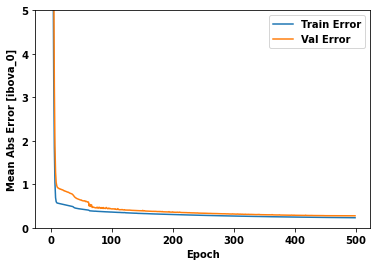

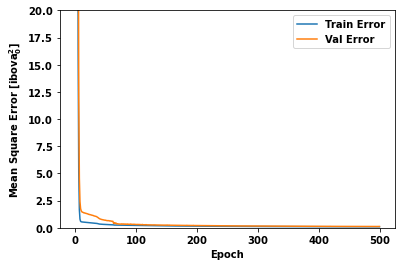

In [110]:
model = build_model()

# O parâmetro patience é o quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mse', patience=25, mode='min' ,restore_best_weights=True)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1, callbacks=[early_stop, tensorboard_callback])

# Mudar os dados de validação

plot_history(history)

In [111]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print(f"Testing set Mean Abs Error: {mse:5.2f} ibova_0")

15/15 - 0s - loss: 0.2634 - mae: 0.3143 - mse: 0.2634
Testing set Mean Abs Error:  0.26 ibova_0


# Realizando as previsões

In [ ]:
test_predictions = model.predict(test_dataset).flatten()

# Avaliando as previsões:

In [ ]:
def show_test_labels():
	# Imprimindo valores reais
	plt.plot(test_labels, color ='r', label='ibova_REAL')
	plt.xlabel("Dates")
	plt.ylabel("Variation ROC")
	plt.title("ibova_REAL")
	plt.legend()

def show_model_predictions():
	# Imprimindo previsoes
	plt.plot(test_predictions, color ='g', label='predictions_MODEL')
	plt.xlabel("Dates")
	plt.ylabel("Variation ROC")
	plt.title("predictions_MODEL")
	plt.legend()

def show_compare_graph():
	# Predictt X Real values
	plt.plot(test_labels, color ='r', label='ibova_REAL')
	plt.plot(test_predictions, color ='g', label='predictions_MODEL')
	plt.xlabel("Dates")
	plt.ylabel("Variation ROC")
	plt.title("Predict X Real values")
	plt.legend()
	plt.show()

def show_true_predict_values():
	plt.figure(figsize=(24,4))
	plt.scatter(test_labels, test_predictions)
	plt.xlabel('True Values [ibova_0]')
	plt.ylabel('Predictions [ibova_0]')
	plt.axis('equal')
	plt.axis('square')
	plt.xlim([0,plt.xlim()[1]])
	plt.ylim([0,plt.ylim()[1]])
	_ = plt.plot([-100, 100], [-100, 100])

In [117]:
# Analisando Medias:

print(f'Massa de predição: {test_predictions.mean()}')
print(f'Massa inicial: {ibova_test.mean()}')
print(f'Diferenças das médias: {ibova_test.mean() - test_predictions.mean()}')

# Add o RM_MSE medio

Massa de predição: 0.020847512409090996
Massa inicial: 0.014602090989644002
Diferenças das médias: -0.006245421419446994


In [118]:
# test_dataset